In [ ]:
import json
from fastai2.basics import *
from fastai2.text.all import *

from fastai2_utils.pytorch.model import *

from text_to_img.data_coco import *
from text_to_img.model import *
from text_to_img.loss import *
from text_to_img.learner import *

In [ ]:
from fastai2.vision.gan import *

In [ ]:
# all_skip

# Train Generator
>

In [ ]:
pretrained_lm_path = Path('./coco_small/awd_lstm-1.pt')
pretrained_vocab_path = Path('./coco_small/vocab.json')

## Datasets and DataLoaders

In [ ]:
vocab = json.loads(pretrained_vocab_path.read_text())

In [ ]:
dsets = get_small_gen_dsets(vocab, pct=0.0005)
len(dsets)

loading annotations into memory...
Done (t=1.16s)
creating index...
index created!


20

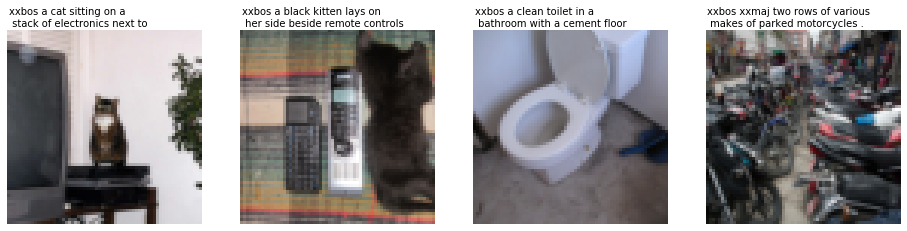

In [ ]:
dls = get_gen_dls(dsets, bs=16, size=64)
dls.show_batch(max_n=4)

## Model

In [ ]:
enc_out_size=1024
dec_out_size=64 
num_dec_layers=3

In [ ]:
%xdel encoder
%xdel decoder
%xdel generator
encoder = Encoder.from_pretrained(pretrained_lm_path, pretrained_vocab_path, enc_out_size)
decoder = Decoder(dec_out_size, enc_out_size, num_dec_layers)
generator = MGenerator(encoder, decoder)

NameError: name 'encoder' is not defined
NameError: name 'decoder' is not defined
NameError: name 'generator' is not defined


In [ ]:
%xdel encoder
%xdel decoder
%xdel generator
encoder = Encoder.from_pretrained(pretrained_lm_path, pretrained_vocab_path, enc_out_size)
decoder = basic_generator(dec_out_size, 3, enc_out_size)
generator = MGenerator(encoder, decoder)

## Learner and Train

In [ ]:
dsets = get_small_gen_dsets(vocab)

loading annotations into memory...
Done (t=1.14s)
creating index...
index created!


### Train on 64px

In [ ]:
%xdel dls
%xdel learn
dls = get_gen_dls(dsets, bs=4, size=64)
# learn = Learner(dls, generator, loss_func=L1LossFlat(), opt_func=Adam).to_fp16()
learn = get_generator_learner(dls, generator)

(0.002290867641568184, 6.30957365501672e-05)

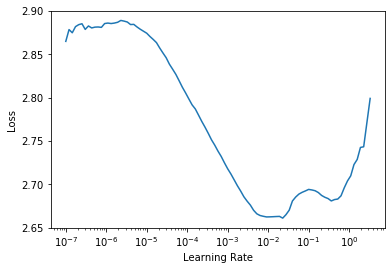

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(20, 2e-4)

epoch,train_loss,valid_loss,time
0,2.345348,2.336649,00:01
1,2.321251,2.335871,00:00
2,2.321817,2.338130,00:00
3,2.318078,2.334761,00:00
4,2.314175,2.331453,00:00
5,2.310890,2.339324,00:00
6,2.307521,2.344355,00:00
7,2.307276,2.338722,00:00
8,2.303113,2.332742,00:00
9,2.300487,2.330598,00:00


In [ ]:
learn.show_results(0, max_n=4)